In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as szk
from sklearn.cluster import KMeans, AgglomerativeClustering
import re

In [114]:
df = pd.read_csv('full_player_stats.csv')

In [115]:
def Clean_names(player_name):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
    if re.search('\S+\s[^,\\]+', player_name):
  
        # Extract the position of beginning of pattern
        pos = re.search('\S+\s[^,\\]+', player_name).end()
  
        # return the cleaned name
        return player_name[:pos]
  
    else:
        # if clean up needed return the same name
        return player_name
def clean_pos(p):
    if re.search('\w+', p):
        pos = re.search('\w+', p).end()
        return p[:pos]

def off_arch(a):
    archs = list(df['Offensive Archetype'].unique())
    return archs.index(a)

def pos(p):
    pos_nums = ['PG', 'SG', 'SF', 'PF', 'C']
    return pos_nums.index(p) + 1

In [116]:
df['Arch Num'] = df['Offensive Archetype'].apply(off_arch)
df['Pos'] = df['Pos'].apply(clean_pos)
df['Pos_Num'] = df['Pos'].apply(pos)
df.drop(columns={'Unnamed: 0','Rk'}, inplace=True)
df.head()

,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Pos,LEBRON,O-LEBRON,D-LEBRON,Wins Added,BOXLEBRON,BOXOLEBRON,BOXDLEBRON,Arch Num,Pos_Num
0,Aaron Gordon,25.0,27,755,15.233333,0.562667,0.369,0.300,5.4,17.133333,...,PF,0.81,0.67,0.14,2.2,0.10,-0.22,0.32,0,4
1,Aaron Holiday,24.0,57,980,8.800000,0.499000,0.427,0.175,1.1,6.700000,...,PG,-1.83,-0.89,-0.94,0.3,-2.56,-1.31,-1.25,1,1
2,Aaron Nesmith,21.0,34,433,6.400000,0.513000,0.712,0.154,4.1,15.500000,...,SF,-1.98,-2.00,0.01,0.1,-2.39,-2.10,-0.29,1,3
3,Abdel Nader,27.0,24,355,13.400000,0.605000,0.371,0.319,2.3,17.100000,...,SF,-1.81,-1.72,-0.09,0.1,-1.29,-1.28,-0.01,1,3
4,Al Horford,34.0,28,782,17.500000,0.538000,0.422,0.061,3.9,21.200000,...,C,1.13,-0.12,1.25,1.8,1.16,0.40,0.76,2,5


In [117]:
shooting = pd.read_csv('player_shooting.csv').drop(columns='Unnamed: 0')
shooting = shooting.groupby('Player').mean().round(3).reset_index()
shooting.head()

,Player,3PA,3P%,2PA,2P%,FTA,FT%
0,Aaron Gordon,3.767,0.351,6.433,0.546,3.133,0.662
1,Aaron Holiday,2.800,0.368,3.700,0.394,1.200,0.809
2,Aaron Nesmith,2.100,0.338,0.900,0.469,0.500,0.722
3,Abdel Nader,1.800,0.419,3.000,0.534,1.500,0.757
4,Adam Mokoka,0.800,0.111,0.700,0.750,0.100,0.000


In [118]:
df = pd.merge(df, shooting, on='Player')
df.columns

Index(['Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'Column1', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Salary',
       'Offensive Archetype', 'Pos', 'LEBRON', 'O-LEBRON', 'D-LEBRON',
       'Wins Added', 'BOXLEBRON', 'BOXOLEBRON', 'BOXDLEBRON', 'Arch Num',
       'Pos_Num', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%'],
      dtype='object')

In [119]:
basic = pd.read_csv('player_basic.csv').drop(columns='Unnamed: 0').groupby('Player').mean().round(1).reset_index()
basic

,Player,TRB,AST,STL,BLK,PTS
0,Aaron Gordon,5.8,3.4,0.7,0.7,13.0
1,Aaron Holiday,1.2,1.6,0.6,0.2,6.9
2,Aaron Nesmith,2.2,0.4,0.3,0.2,3.4
3,Abdel Nader,2.6,0.8,0.4,0.4,6.7
4,Adam Mokoka,0.5,0.5,0.2,0.1,1.4
...,...,...,...,...,...,...
525,Yogi Ferrell,2.0,3.5,1.0,0.3,8.3
526,Yuta Watanabe,3.2,0.7,0.5,0.4,4.2
527,Zach LaVine,5.1,5.1,0.8,0.5,27.5
528,Zeke Nnaji,1.5,0.2,0.2,0.1,3.1


In [120]:
df = pd.merge(df, basic, on='Player')
df.head()

,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,3P%,2PA,2P%,FTA,FT%,TRB,AST,STL,BLK,PTS
0,Aaron Gordon,25.0,27,755,15.233333,0.562667,0.369,0.300,5.4,17.133333,...,0.351,6.433,0.546,3.133,0.662,5.8,3.4,0.7,0.7,13.0
1,Aaron Holiday,24.0,57,980,8.800000,0.499000,0.427,0.175,1.1,6.700000,...,0.368,3.700,0.394,1.200,0.809,1.2,1.6,0.6,0.2,6.9
2,Aaron Nesmith,21.0,34,433,6.400000,0.513000,0.712,0.154,4.1,15.500000,...,0.338,0.900,0.469,0.500,0.722,2.2,0.4,0.3,0.2,3.4
3,Abdel Nader,27.0,24,355,13.400000,0.605000,0.371,0.319,2.3,17.100000,...,0.419,3.000,0.534,1.500,0.757,2.6,0.8,0.4,0.4,6.7
4,Al Horford,34.0,28,782,17.500000,0.538000,0.422,0.061,3.9,21.200000,...,0.368,7.400,0.510,0.800,0.818,6.7,3.4,0.9,0.9,14.2


In [194]:
cluster_variables = [
    'PTS',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'VORP'
]

# cluster_variables = [
#     'PER',
#     'BPM',
#     'USG%',
#     'AST%',
#     'TS%',
#     'WS'
# ]

## K-Means 

In [195]:
cluster_df = df[cluster_variables]
# cluster_df = df.drop(columns={'Player', 'Age', 'G', 'MP', 'Offensive Archetype', 'Salary', 'Arch Num', 'Pos_Num', 'Pos', 'Column1'})
cluster_df

,PTS,TRB,AST,STL,BLK,VORP
0,13.0,5.8,3.4,0.7,0.7,0.533333
1,6.9,1.2,1.6,0.6,0.2,-0.600000
2,3.4,2.2,0.4,0.3,0.2,-0.300000
3,6.7,2.6,0.8,0.4,0.4,0.200000
4,14.2,6.7,3.4,0.9,0.9,1.000000
...,...,...,...,...,...,...
400,6.8,4.4,1.3,0.8,0.6,0.400000
401,4.2,3.2,0.7,0.5,0.4,0.200000
402,27.5,5.1,5.1,0.8,0.5,2.700000
403,3.1,1.5,0.2,0.2,0.1,-0.100000


### 5 Clusters 

In [196]:
# Initialise KMeans instance
np.random.seed(1234)
kmeans5 = KMeans(n_clusters=5)


In [197]:
# Set the seed for reproducibility
# np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans5.fit(df[cluster_variables])


In [198]:
k5cls.labels_

array([3, 0, 2, 0, 3, 2, 3, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 3, 3, 3, 2, 0, 4, 3, 2, 4, 3, 0, 2, 2, 0,
       1, 2, 4, 2, 3, 0, 0, 1, 3, 2, 0, 2, 3, 1, 2, 1, 0, 1, 3, 2, 0, 3,
       4, 0, 1, 0, 2, 2, 2, 4, 0, 0, 0, 2, 0, 3, 0, 2, 3, 1, 2, 0, 4, 1,
       3, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 3, 3, 0, 4, 2, 3, 0, 0, 1,
       1, 4, 3, 3, 0, 0, 3, 3, 0, 2, 2, 2, 2, 0, 3, 3, 2, 3, 3, 1, 0, 3,
       2, 0, 2, 1, 0, 0, 2, 3, 0, 0, 4, 2, 1, 0, 0, 2, 3, 3, 1, 0, 0, 2,
       2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 2,
       0, 3, 2, 0, 2, 1, 4, 0, 3, 2, 0, 3, 2, 2, 0, 4, 0, 4, 3, 0, 0, 1,
       0, 2, 2, 4, 3, 3, 4, 1, 2, 1, 2, 1, 2, 3, 2, 0, 3, 2, 3, 1, 4, 3,
       0, 2, 0, 2, 4, 4, 2, 3, 3, 1, 3, 0, 0, 4, 3, 3, 2, 0, 0, 1, 0, 1,
       3, 3, 1, 4, 3, 3, 1, 0, 2, 3, 4, 3, 3, 3, 4, 0, 2, 0, 1, 1, 3, 0,
       3, 3, 0, 0, 3, 2, 2, 2, 2, 0, 2, 2, 3, 1, 0, 2, 3, 0, 2, 0, 3, 3,
       2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 0, 0, 4, 4, 2,

In [199]:
df['k5cls'] = k5cls.labels_
cluster_df['k5cls'] = k5cls.labels_

C:\Users\angus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
# Group data table by cluster label and count observations
k5sizes = df.groupby('k5cls').size()
k5sizes

k5cls
0    124
1     47
2    120
3     85
4     29
dtype: int64

In [217]:
k5means = df.groupby('k5cls')[cluster_variables].mean().round(3)
k5means['Count'] = k5sizes
k5means['Count'] = k5means['Count'].round()
k5means.T

k5cls,0,1,2,3,4
PTS,7.541,18.170,3.333,12.467,25.952
TRB,4.106,6.149,1.963,4.529,6.893
AST,1.707,4.074,0.778,2.515,6.003
STL,0.652,1.096,0.362,0.773,1.117
BLK,0.542,0.651,0.226,0.536,0.562
VORP,0.186,1.176,-0.072,0.438,2.889
Count,124.000,47.000,120.000,85.000,29.000


In [202]:
# Index df on cluster ID
tidy_df5 = df.set_index('k5cls')
# Keep only variables used for clustering
tidy_df5 = tidy_df5[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_df5 = tidy_df5.stack()
# Take indices into proper columns
tidy_df5 = tidy_df5.reset_index()
# Rename column names
tidy_df5 = tidy_df5.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_df5.head()

,k5cls,Attribute,Values
0,3,PTS,13.0
1,3,TRB,5.8
2,3,AST,3.4
3,3,STL,0.7
4,3,BLK,0.7


In [210]:
df[['Player','Pos', 'k5cls']].groupby(['k5cls', 'Pos']).count()[:5]

Player
k5cls Pos        
0     C        35
      PF       27
      PG       19
      SF       15
      SG       28

In [211]:
df[['Player','Pos', 'k5cls']].groupby(['k5cls', 'Pos']).count()[5:10]

Player
k5cls Pos        
1     C         8
      PF        8
      PG       14
      SF        6
      SG       11

In [212]:
df[['Player','Pos', 'k5cls']].groupby(['k5cls', 'Pos']).count()[10:15]

Player
k5cls Pos        
2     C        16
      PF       35
      PG       15
      SF       26
      SG       28

In [213]:
df[['Player','Pos', 'k5cls']].groupby(['k5cls', 'Pos']).count()[15:20]

Player
k5cls Pos        
3     C        18
      PF       16
      PG       17
      SF       13
      SG       21

In [214]:
df[['Player','Pos', 'k5cls']].groupby(['k5cls', 'Pos']).count()[20:]

Player
k5cls Pos        
4     C         4
      PF        4
      PG       10
      SF        5
      SG        6

### Plotting Properties Distributions for Clusters

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

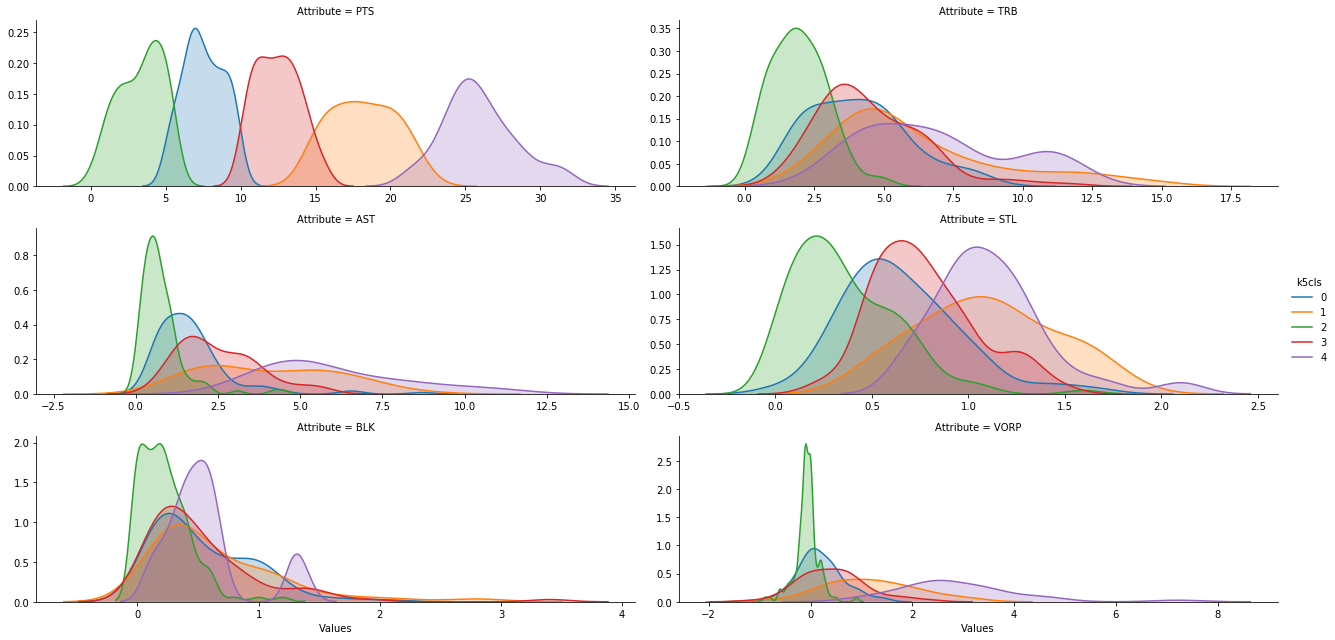

In [216]:
# Setup the facets
facets = sns.FacetGrid(data=tidy_df5, col='Attribute', hue='k5cls', \
                  sharey=False, sharex=False, aspect=3, col_wrap=2)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

In [22]:
cluster_variables

['PTS', 'TRB', 'AST', 'STL', 'BLK']

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


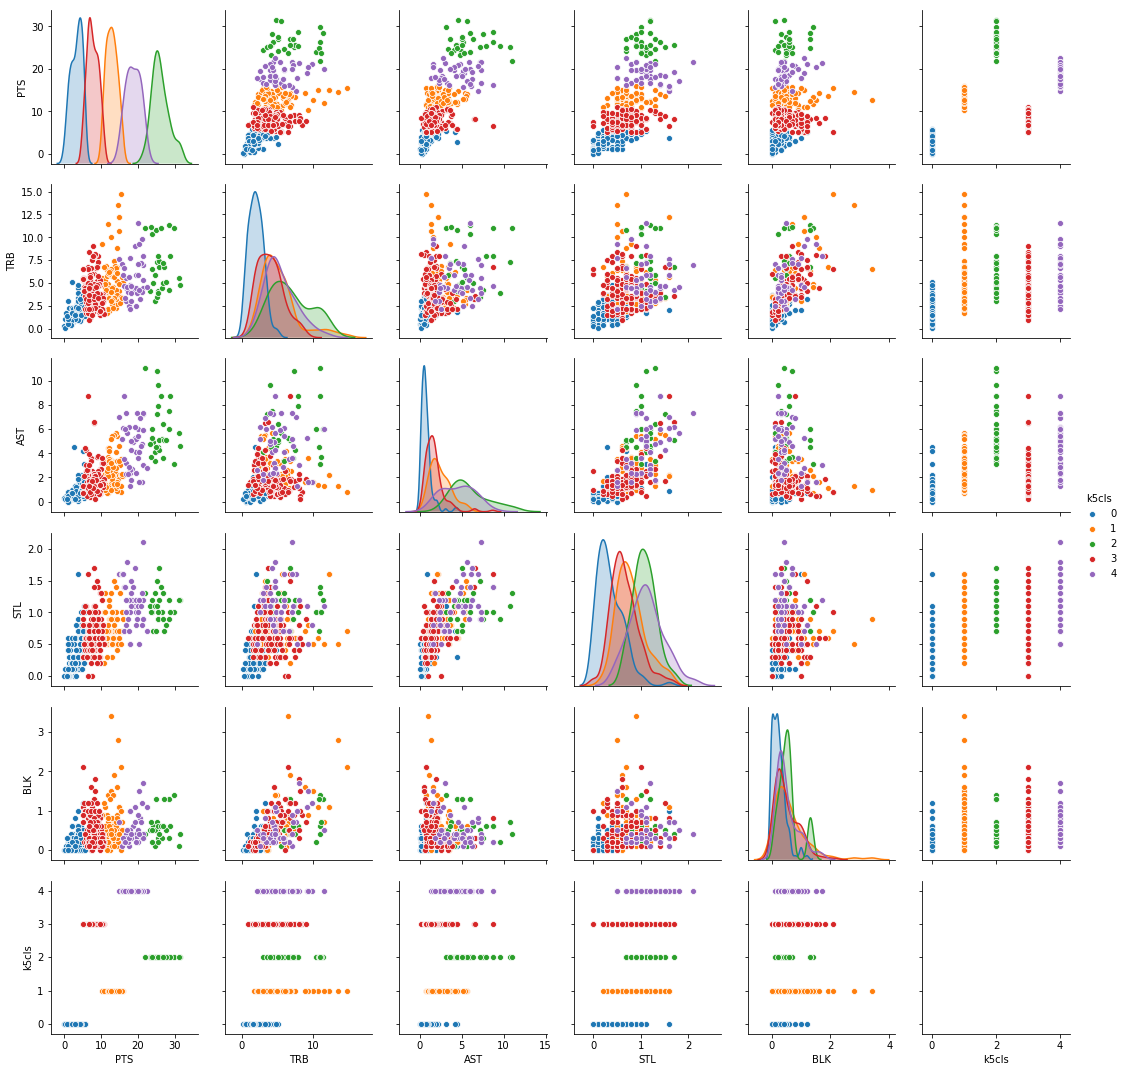

In [26]:
sns.pairplot(cluster_df.drop(columns={'k4cls', 'k3cls', 'k8cls'}), hue="k5cls", kind='scatter', diag_kind="kde")

### Testing Plots for Position

In [ ]:
mod_vars = cluster_variables
mod_vars.append('Arch Num')

In [ ]:
mod_df = df[mod_vars]
sns.pairplot(mod_df.loc[mod_df['Arch Num'] == 2] , hue='Arch Num', kind='scatter', diag_kind='kde')

In [ ]:
df.iloc[:,5] = (df.iloc[:,5]).astype('int') #round Games to int
df.iloc[:,[6,7,8,9,12,13,15,16,17,18,19,21,23]] = df.iloc[:,[6,7,8,9,12,13,15,16,17,18,19,21,23]].round(3)
df[df['Player'] == 'Nikola Jokic']

In [28]:
df.columns

Index(['Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'Column1', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Salary',
       'Offensive Archetype', 'Pos', 'LEBRON', 'O-LEBRON', 'D-LEBRON',
       'Wins Added', 'BOXLEBRON', 'BOXOLEBRON', 'BOXDLEBRON', 'Arch Num',
       'Pos_Num', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'TRB', 'AST',
       'STL', 'BLK', 'PTS', 'k5cls', 'k4cls', 'k3cls', 'k8cls'],
      dtype='object')

In [209]:
df.to_csv('data_with_clusters.csv')